<a href="https://colab.research.google.com/github/manashpratim/Intel-image-Classification/blob/master/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import cv2
import pandas as pd

#Downloading the Datasets
!wget --no-check-certificate \
        "https://storage.googleapis.com/kaggle-datasets/111880/269359/seg_train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562383437&Signature=BgOfeAbLpFAV66tyffrEC9l0mfTTNAtycPbvx7PTCcFDxycV3jE32Kvd1z1Tw3EGHJe%2BzkrTqnWOmzKxEvTu%2Faziyd%2FzIB93ZW4sB5zdpwQ8lsGGctyjY6sttErv9KIXo9C17JcD02t1KFHmx60Jm9seuI5AVKlBNO%2BGjnkKMGBKOZV3%2F%2FjYPIMYp9foFCDtxifs46TKmu%2FBX%2FT5pr%2BxCtodcjp9griuldsFmTIa4zLpsNaiT3%2B0iWLEmhkJiYgJhObEHDfLBkT5VcWT9PZ3YBbEJ5D89BuaxU%2FGR%2B2sp48rM%2FMCSJOR6I0qIyvFZAKfkc7buPEfhgj3x97kgffTMg%3D%3D"\
        -O "/tmp/train.zip" 
         
!wget --no-check-certificate \
        "https://storage.googleapis.com/kaggle-datasets/111880/269359/seg_test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562383557&Signature=rYQRmhQ4dWZeEtf7AbN2Pa7exH8taRx2FCX09lnWiCUlUOgvm67m0Z83N7mvVctkDX%2BM9%2FZD8SahuoslIjIr%2FjiUol7zNcW4%2B10JciTtvPFkaiPhi0%2B66baD4CkZZOLU41RoiQlUzyc04WhOgVmRNyhuEot9AdbUPktEDXVmYoeshJJjJJf8Tn%2FfFfaNJOlVwrIHOHSkf79uIiNd7Sh0gblgqLk9k%2B%2F7d%2FJN4Dy4plXNyBsHii9mr6wvxZmhOLf0OoIeeuYeLo%2B9j61%2BkZcOdYEBu2Jt8mS3Px5D1qZN6HPev5mw9CDwKFwbXhoYXxvu2ulZl4x1Tf3r6ajfpiOttw%3D%3D"\
        -O "/tmp/test.zip" 

!wget --no-check-certificate \
        "https://storage.googleapis.com/kaggle-datasets/111880/269359/seg_pred.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562383567&Signature=tChUow%2FR7F%2FEuBcqlFSO1xtZtOrQU%2B5TvjuoLgblsGaHr0DCpS%2FBob0qbwvJJHg4Re7ycg6sDDN0BJoIR1eShTwAhttNaIa3vFbcmtPnjlFHAtNZILpnU%2FNZIR1hSKYf36Uq56ptw1ut6lvcbeRtRXJUfa4yQNKllx0yAYPiwrfP0mCFvg4QxZr486neW8hdNDu4eBuadeODVqZghv0COobcHGguKd%2FjuC25plKbN8efjG23sWaIDHcY2M4%2B9fl%2BpFPECPiQ14oCBbvnyY%2BzR1ZvqZYssSrK1Yg4%2BEvP%2FdIh5i3DJEDlAkNFEJmHrE6gHi0n18wMUNF9xccTr6eMXw%3D%3D"\
        -O "/tmp/pred.zip"

#Unzipping the train and test folders
import os
import zipfile

local_zip='/tmp/train.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/train')
zip_ref.close()


local_zip='/tmp/test.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

local_zip='/tmp/pred.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/pred')
zip_ref.close()



--2019-07-05 01:18:56--  https://storage.googleapis.com/kaggle-datasets/111880/269359/seg_train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562383437&Signature=BgOfeAbLpFAV66tyffrEC9l0mfTTNAtycPbvx7PTCcFDxycV3jE32Kvd1z1Tw3EGHJe%2BzkrTqnWOmzKxEvTu%2Faziyd%2FzIB93ZW4sB5zdpwQ8lsGGctyjY6sttErv9KIXo9C17JcD02t1KFHmx60Jm9seuI5AVKlBNO%2BGjnkKMGBKOZV3%2F%2FjYPIMYp9foFCDtxifs46TKmu%2FBX%2FT5pr%2BxCtodcjp9griuldsFmTIa4zLpsNaiT3%2B0iWLEmhkJiYgJhObEHDfLBkT5VcWT9PZ3YBbEJ5D89BuaxU%2FGR%2B2sp48rM%2FMCSJOR6I0qIyvFZAKfkc7buPEfhgj3x97kgffTMg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208832464 (199M) [application/x-zip-compressed]
Saving to: ‘/tmp/train.zip’

/tmp/train.zip      100%[===================>] 199.16M  70.3MB/s    in 2.8s    

2019-07-05 01:18:59 (70.3

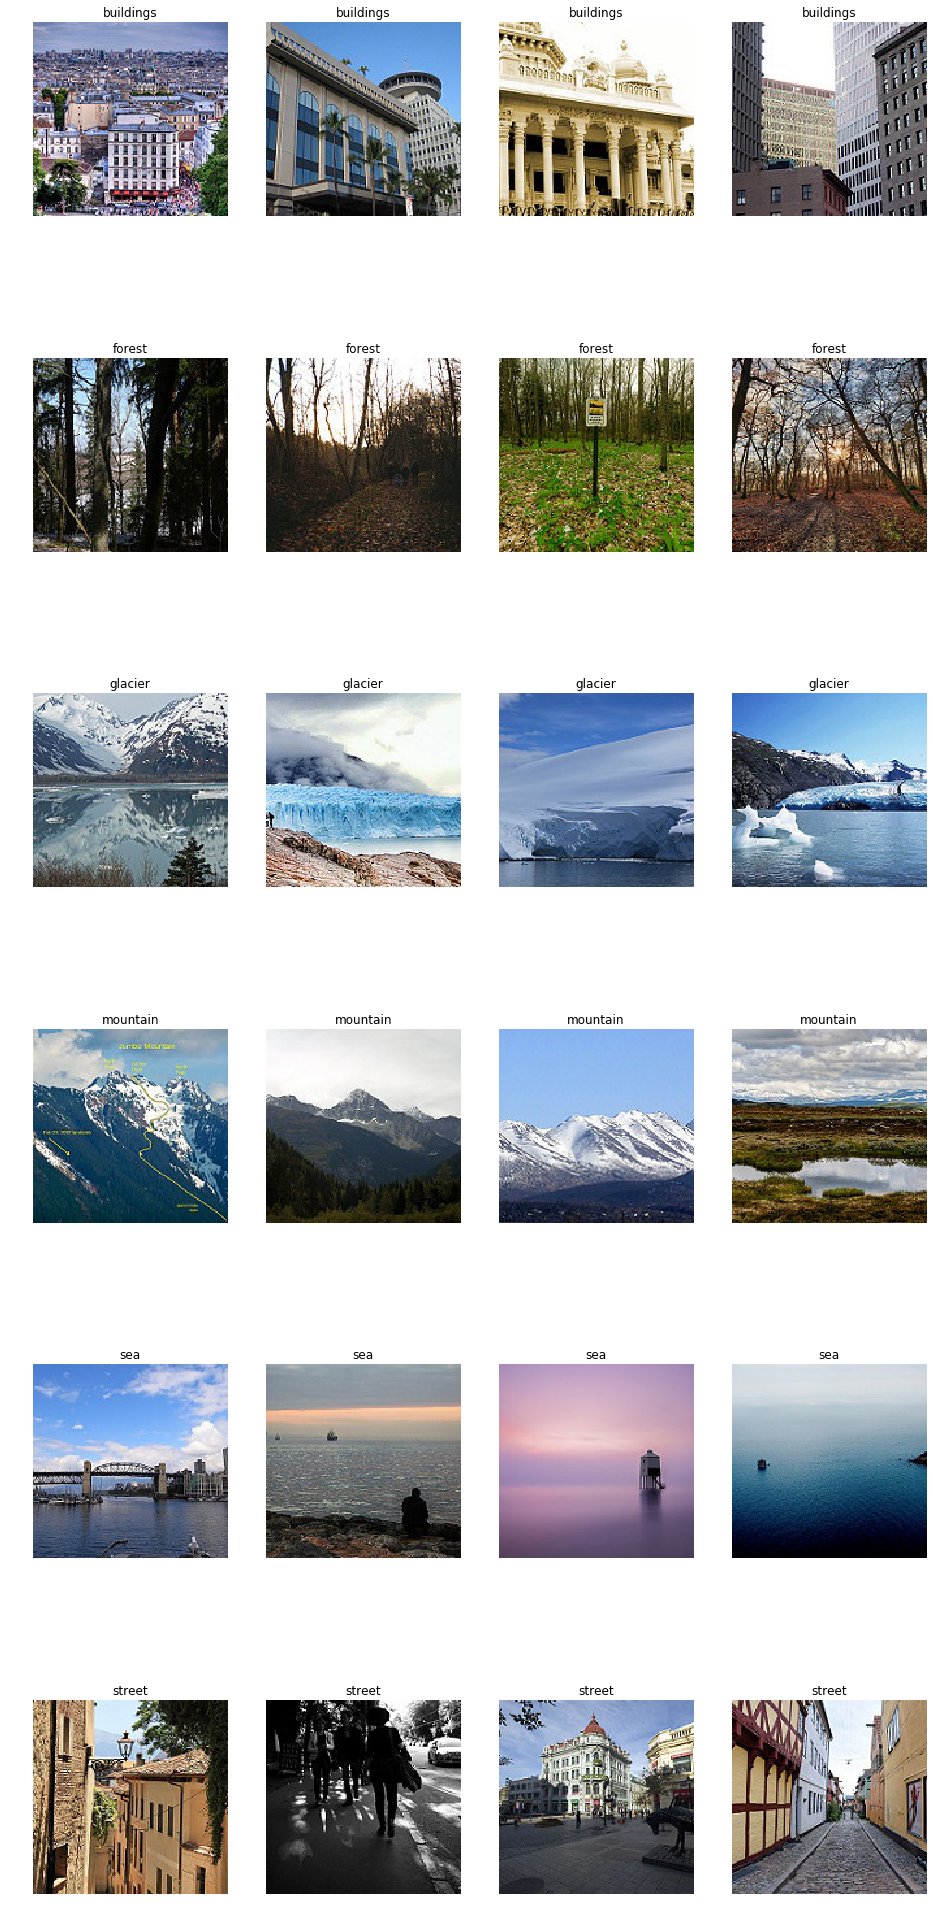

In [2]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
#Displaying theImages
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#We'll output images in a 6X4 configuration. 

nrows=6
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*6)

pic_index+=4

next_a_pix = [os.path.join('/tmp/train/seg_train/'+classes[0]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[0]+'/')[pic_index-4:pic_index]]
next_b_pix = [os.path.join('/tmp/train/seg_train/'+classes[1]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[1]+'/')[pic_index-4:pic_index]]
next_c_pix = [os.path.join('/tmp/train/seg_train/'+classes[2]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[2]+'/')[pic_index-4:pic_index]]
next_d_pix = [os.path.join('/tmp/train/seg_train/'+classes[3]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[3]+'/')[pic_index-4:pic_index]]
next_e_pix = [os.path.join('/tmp/train/seg_train/'+classes[4]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[4]+'/')[pic_index-4:pic_index]]
next_f_pix = [os.path.join('/tmp/train/seg_train/'+classes[5]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[5]+'/')[pic_index-4:pic_index]]

j=0
for i, img_path in enumerate(next_a_pix+next_b_pix+next_c_pix+next_d_pix+next_e_pix+next_f_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

  if i%4==0 and i>=4:
    j=j+1
  sp.title.set_text(classes[j])

  
plt.show()

In [66]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)

"""train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.01,
      zoom_range=[0.1, 1.5],
      horizontal_flip=True,
      fill_mode='nearest',
      zca_whitening=True,
      brightness_range=[0.1, 2]
)"""


train_generator=train_datagen.flow_from_directory(
      '/tmp/train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)

validation_generator=train_datagen.flow_from_directory(
      '/tmp/train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_datagen.flow_from_directory(
    '/tmp/test/seg_test/', 
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse',
    seed=2209
) 

test1_datagen = ImageDataGenerator(rescale = 1./255.)
test1_generator = test1_datagen.flow_from_directory(
    '/tmp/test/seg_test/', 
    target_size=(150,150),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=2209
) 

Found 12632 images belonging to 6 classes.
Found 1402 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
SEED = 2209
import os
import random as rn
import numpy as np
from tensorflow import set_random_seed

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
set_random_seed(SEED)
rn.seed(SEED)

# **Convolutional Neural Network**

In [0]:
import tensorflow as tf
from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
  
    tf.keras.layers.Flatten(),
       
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(6,activation='softmax')
])

In [23]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit_generator(
  train_generator,
  steps_per_epoch=int(14034/64),
  epochs=50,
  validation_data=validation_generator,
  validation_steps=int(1402/64),
  callbacks=[reduce],
  verbose=1
)

Epoch 1/50
219/219 [==============================] - 120s 546ms/step - loss: 1.6726 - acc: 0.3554 - val_loss: 4.9593 - val_acc: 0.1801
Epoch 2/50
219/219 [==============================] - 102s 464ms/step - loss: 1.1918 - acc: 0.5174 - val_loss: 1.4867 - val_acc: 0.4926
Epoch 3/50
219/219 [==============================] - 102s 468ms/step - loss: 0.9914 - acc: 0.6368 - val_loss: 1.0966 - val_acc: 0.6302
Epoch 4/50
219/219 [==============================] - 102s 465ms/step - loss: 0.8863 - acc: 0.6964 - val_loss: 1.0696 - val_acc: 0.6205
Epoch 5/50
219/219 [==============================] - 102s 467ms/step - loss: 0.8107 - acc: 0.7294 - val_loss: 1.0139 - val_acc: 0.6607
Epoch 6/50
219/219 [==============================] - 102s 466ms/step - loss: 0.7505 - acc: 0.7555 - val_loss: 0.7182 - val_acc: 0.7530
Epoch 7/50
219/219 [==============================] - 102s 466ms/step - loss: 0.7064 - acc: 0.7756 - val_loss: 1.3511 - val_acc: 0.6243
Epoch 8/50
219/219 [============================

In [61]:
accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

2/2 - 0s - loss: 0.3731 - acc: 0.9062
Accuracy of the model on the test set:  0.90625


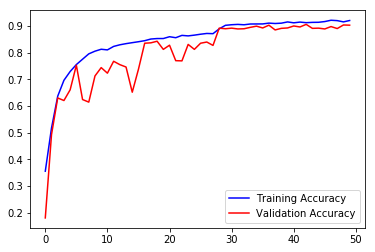

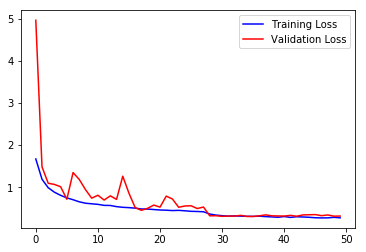

In [27]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['acc']
val_acc=history1.history['val_acc']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

# **DenseNet121**

In [0]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.densenet import DenseNet121
import keras


base_model1=DenseNet121(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model1.trainable = False

x = Dense(256, activation='relu')(base_model1.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model1 = Model(base_model1.input, x) 
transfer_model1.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [72]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history2 = transfer_model1.fit_generator(
            train_generator,
            steps_per_epoch=int(14034/64),
            epochs=50,
            validation_data=validation_generator,
            validation_steps=int(1402/64),
            callbacks=[reduce],
            verbose=1)

Epoch 1/50
219/219 [==============================] - 225s 1s/step - loss: 2.3504 - acc: 0.2276 - val_loss: 1.6034 - val_acc: 0.3891
Epoch 2/50
219/219 [==============================] - 189s 864ms/step - loss: 1.8856 - acc: 0.3158 - val_loss: 1.3113 - val_acc: 0.5247
Epoch 3/50
219/219 [==============================] - 189s 862ms/step - loss: 1.5795 - acc: 0.4082 - val_loss: 1.1043 - val_acc: 0.6248
Epoch 4/50
219/219 [==============================] - 189s 863ms/step - loss: 1.3725 - acc: 0.4912 - val_loss: 0.9408 - val_acc: 0.6981
Epoch 5/50
219/219 [==============================] - 189s 862ms/step - loss: 1.2087 - acc: 0.5525 - val_loss: 0.8562 - val_acc: 0.7242
Epoch 6/50
219/219 [==============================] - 189s 862ms/step - loss: 1.0871 - acc: 0.6028 - val_loss: 0.7542 - val_acc: 0.7616
Epoch 7/50
219/219 [==============================] - 189s 862ms/step - loss: 0.9972 - acc: 0.6350 - val_loss: 0.6851 - val_acc: 0.7870
Epoch 8/50
219/219 [==============================]

In [76]:
accuracy1=transfer_model1.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy1[1])

Accuracy of the model on the test set:  0.921875


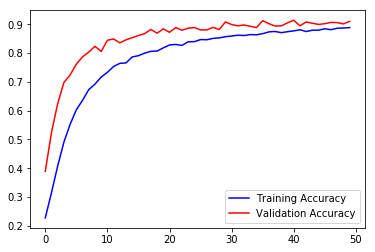

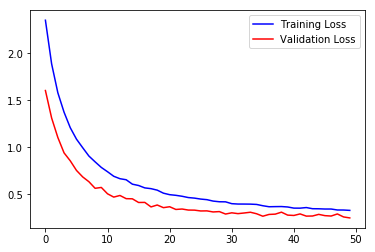

In [74]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()